In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
#train_images.shape
#test_images.shape

170498071/170498071 [==============================] - 22s 0us/step


In [3]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [4]:
train_norm = X_train.astype('float32')
test_norm = X_test.astype('float32')
# normalize to range 0-1
X_train = train_norm / 255.0
X_test = test_norm / 255.0

In [5]:
import matplotlib.pyplot as plt
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [6]:
def define_model():
	model = tf.keras.models.Sequential()                   # He weight initialization,
	model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(layers.MaxPooling2D((2, 2)))
	model.add(layers.Flatten())
	model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(layers.Dense(10, activation='softmax'))
	# compile model
	opt = tf.keras.optimizers.Adam()
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [7]:
model1=define_model()
history = model1.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/15
782/782 [==============================] - 13s 6ms/step - loss: 1.3997 - accuracy: 0.5048 - val_loss: 1.1400 - val_accuracy: 0.5984
Epoch 2/15
782/782 [==============================] - 5s 6ms/step - loss: 0.9901 - accuracy: 0.6531 - val_loss: 0.9834 - val_accuracy: 0.6540
Epoch 3/15
782/782 [==============================] - 4s 6ms/step - loss: 0.8347 - accuracy: 0.7080 - val_loss: 0.9712 - val_accuracy: 0.6627
Epoch 4/15
782/782 [==============================] - 4s 6ms/step - loss: 0.7111 - accuracy: 0.7516 - val_loss: 0.9818 - val_accuracy: 0.6632
Epoch 5/15
782/782 [==============================] - 4s 5ms/step - loss: 0.6030 - accuracy: 0.7906 - val_loss: 0.9983 - val_accuracy: 0.6699
Epoch 6/15
782/782 [==============================] - 4s 6ms/step - loss: 0.4960 - accuracy: 0.8274 - val_loss: 1.0464 - val_accuracy: 0.6717
Epoch 7/15
782/782 [==============================] - 4s 6ms/step - loss: 0.3976 - accuracy: 0.8618 - val_loss: 1.1324 - val_accuracy: 0.6692
Epoch

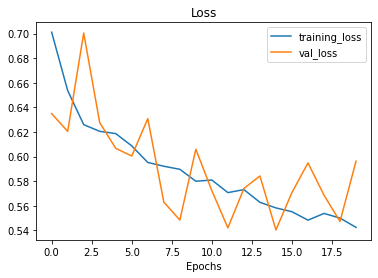

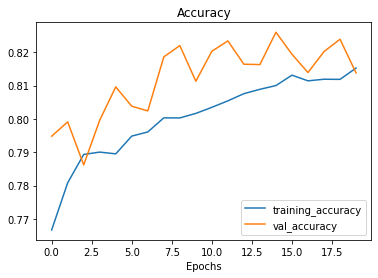

In [14]:
plot_loss_curves(history)

In [9]:
def define_model():
	model = tf.keras.models.Sequential()
	model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(layers.MaxPooling2D((2, 2)))
	model.add(layers.Dropout(0.2))
	model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(layers.MaxPooling2D((2, 2)))
	model.add(layers.Dropout(0.2))
	model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(layers.MaxPooling2D((2, 2)))
	model.add(layers.Dropout(0.2))
	model.add(layers.Flatten())
	model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(layers.Dropout(0.2))
	model.add(layers.Dense(10, activation='softmax'))
	# compile model
	opt = tf.keras.optimizers.Adam()
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [10]:
model2=define_model()
history = model2.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/50
782/782 [==============================] - 8s 9ms/step - loss: 1.7053 - accuracy: 0.3697 - val_loss: 1.2716 - val_accuracy: 0.5418
Epoch 2/50
782/782 [==============================] - 7s 9ms/step - loss: 1.2302 - accuracy: 0.5597 - val_loss: 1.0026 - val_accuracy: 0.6477
Epoch 3/50
782/782 [==============================] - 7s 10ms/step - loss: 1.0169 - accuracy: 0.6416 - val_loss: 0.8694 - val_accuracy: 0.6917
Epoch 4/50
782/782 [==============================] - 7s 9ms/step - loss: 0.8875 - accuracy: 0.6874 - val_loss: 0.8006 - val_accuracy: 0.7215
Epoch 5/50
782/782 [==============================] - 7s 9ms/step - loss: 0.7993 - accuracy: 0.7204 - val_loss: 0.7451 - val_accuracy: 0.7428
Epoch 6/50
782/782 [==============================] - 7s 9ms/step - loss: 0.7260 - accuracy: 0.7459 - val_loss: 0.7057 - val_accuracy: 0.7575
Epoch 7/50
782/782 [==============================] - 7s 8ms/step - loss: 0.6780 - accuracy: 0.7624 - val_loss: 0.6936 - val_accuracy: 0.7658
Epoch

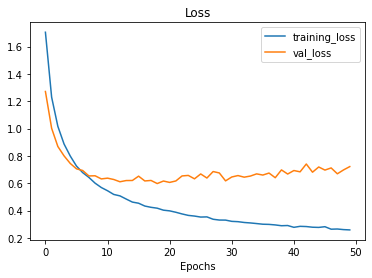

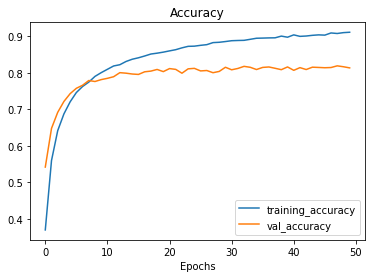

In [11]:
plot_loss_curves(history)

In [12]:
# DATA AUG:
from keras.preprocessing.image import ImageDataGenerator
# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(X_train, y_train, batch_size=64)

In [13]:
# fit model
steps = int(X_train.shape[0] / 64)
history = model2.fit_generator(it_train, steps_per_epoch=steps, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20


<ipython-input-13-d1febac5f565>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model2.fit_generator(it_train, steps_per_epoch=steps, epochs=20, validation_data=(X_test, y_test))


781/781 [==============================] - 27s 34ms/step - loss: 0.7011 - accuracy: 0.7667 - val_loss: 0.6350 - val_accuracy: 0.7948
Epoch 2/20
781/781 [==============================] - 26s 33ms/step - loss: 0.6536 - accuracy: 0.7808 - val_loss: 0.6205 - val_accuracy: 0.7991
Epoch 3/20
781/781 [==============================] - 26s 33ms/step - loss: 0.6260 - accuracy: 0.7893 - val_loss: 0.7004 - val_accuracy: 0.7862
Epoch 4/20
781/781 [==============================] - 26s 33ms/step - loss: 0.6205 - accuracy: 0.7900 - val_loss: 0.6276 - val_accuracy: 0.7996
Epoch 5/20
781/781 [==============================] - 26s 33ms/step - loss: 0.6187 - accuracy: 0.7895 - val_loss: 0.6067 - val_accuracy: 0.8096
Epoch 6/20
781/781 [==============================] - 26s 33ms/step - loss: 0.6087 - accuracy: 0.7948 - val_loss: 0.6005 - val_accuracy: 0.8038
Epoch 7/20
781/781 [==============================] - 26s 33ms/step - loss: 0.5953 - accuracy: 0.7961 - val_loss: 0.6308 - val_accuracy: 0.8024
Epo

In [18]:
# define cnn model

def define_model():
	model = tf.keras.models.Sequential()
	model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(layers.BatchNormalization())
	model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(layers.BatchNormalization())
	model.add(layers.MaxPooling2D((2, 2)))
	model.add(layers.Dropout(0.2))
	model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(layers.BatchNormalization())
	model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(layers.BatchNormalization())
	model.add(layers.MaxPooling2D((2, 2)))
	model.add(layers.Dropout(0.3))
	model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(layers.BatchNormalization())
	model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(layers.BatchNormalization())
	model.add(layers.MaxPooling2D((2, 2)))
	model.add(layers.Dropout(0.4))
	model.add(layers.Flatten())
	model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(layers.BatchNormalization())
	model.add(layers.Dropout(0.5))
	model.add(layers.Dense(10, activation='softmax'))
	# compile model
	opt = tf.keras.optimizers.Adam()
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [17]:
model3=define_model()
# fit model
steps = int(X_train.shape[0] / 64)
history = model3.fit_generator(it_train, steps_per_epoch=steps, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20


<ipython-input-17-4f8660515d48>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model3.fit_generator(it_train, steps_per_epoch=steps, epochs=20, validation_data=(X_test, y_test))


781/781 [==============================] - 28s 34ms/step - loss: 1.7922 - accuracy: 0.3785 - val_loss: 1.4143 - val_accuracy: 0.4910
Epoch 2/20
781/781 [==============================] - 26s 34ms/step - loss: 1.2813 - accuracy: 0.5387 - val_loss: 1.1131 - val_accuracy: 0.6095
Epoch 3/20
781/781 [==============================] - 26s 33ms/step - loss: 1.0775 - accuracy: 0.6173 - val_loss: 1.1018 - val_accuracy: 0.6205
Epoch 4/20
781/781 [==============================] - 26s 33ms/step - loss: 0.9570 - accuracy: 0.6669 - val_loss: 0.8345 - val_accuracy: 0.7111
Epoch 5/20
781/781 [==============================] - 26s 33ms/step - loss: 0.8698 - accuracy: 0.6997 - val_loss: 0.8350 - val_accuracy: 0.7174
Epoch 6/20
781/781 [==============================] - 26s 33ms/step - loss: 0.8108 - accuracy: 0.7211 - val_loss: 0.7420 - val_accuracy: 0.7474
Epoch 7/20
781/781 [==============================] - 26s 33ms/step - loss: 0.7680 - accuracy: 0.7352 - val_loss: 0.7750 - val_accuracy: 0.7425
Epo

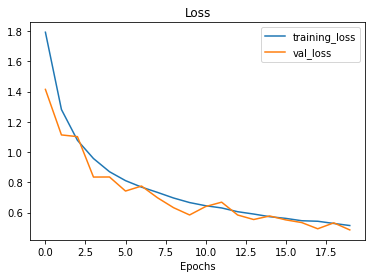

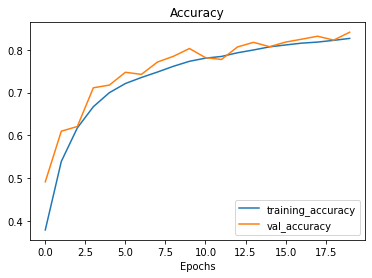

In [19]:
plot_loss_curves(history)